<h3>Problem Statement: Liver Disease Prediction</h3>

Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.
Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:
1. Age of the patient
2. Gender of the patient
3. Total Bilirubin
4. Direct Bilirubin
5. Alkaline Phosphotase
6. Alamine Aminotransferase
7. Aspartate Aminotransferase
8. Total Protiens
9. Albumin
10. Albumin and Globulin Ratio
11. Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

Dataset: https://www.kaggle.com/uciml/indian-liver-patient-records

Algorithms used:
1. Support Vector Machine
2. K Nearest Neighbors
3. Logistic Regression

<h3>Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

<h3>Reading Dataset

In [2]:
data=pd.read_csv("liver.csv")

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<h3>Renaming Output Feature

In [4]:
data.rename(columns = {'Dataset':'Target'}, inplace = True)

In [5]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:>

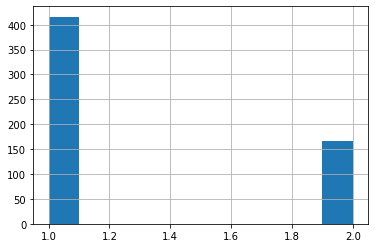

In [6]:
data['Target'].hist()

In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Target,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


<h3>Encoding Categorical Features

In [9]:
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [10]:
gender

,Male
0,0
1,1
2,1
3,1
4,1
...,...
578,1
579,1
580,1
581,1


In [11]:
data.drop(['Gender'],axis=1,inplace=True)

In [12]:
data['Male']=gender

In [13]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


<h3>Checking for missing values

In [14]:
data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
Male                          0
dtype: int64

In [15]:
data["Albumin_and_Globulin_Ratio"].fillna(data["Albumin_and_Globulin_Ratio"].mean(), inplace=True)

In [16]:
data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
Male                          0
dtype: int64

<h3>Splitting of Data into Independent and Dependent Variables

In [17]:
X=data.drop(['Target'],axis=1)
Y=data['Target']

In [18]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

<h3>Standardisation

In [20]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [21]:
X

array([[ 1.25209764, -0.41887783, -0.49396398, ...,  0.19896867,
        -0.14789798, -1.76228085],
       [ 1.06663704,  1.22517135,  1.43042334, ...,  0.07315659,
        -0.65069686,  0.56744644],
       [ 1.06663704,  0.6449187 ,  0.93150811, ...,  0.19896867,
        -0.17932291,  0.56744644],
       ...,
       [ 0.44843504, -0.4027597 , -0.45832717, ...,  0.07315659,
         0.16635131,  0.56744644],
       [-0.84978917, -0.32216906, -0.35141677, ...,  0.32478075,
         0.16635131,  0.56744644],
       [-0.41704777, -0.37052344, -0.42269037, ...,  1.58290153,
         1.73759779,  0.56744644]])

<h3>Test Train Split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [23]:
print(X_train.shape)
print(X_test.shape)

(466, 10)
(117, 10)


<h3>Logistic Regression Model

In [24]:
def logistic(X_train,Y_train,X_test,Y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,Y_train)
    y_pred=log_model.predict(X_test)
    print("Accuracy using Logistic Regression:",accuracy_score(Y_test,y_pred))

<h3>K Nearest Neighbors

In [25]:
def findK(X_train,Y_train,X_test,Y_test):
    k=[i for i in range(1,41)]
    accuracy=[]
    
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        accuracy.append(accuracy_score(Y_test, y_pred))
        
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs K Value")
    plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    
    max_accuracy=max(accuracy)
    return accuracy.index(max(accuracy))+1

def knn(X_train,Y_train,X_test,Y_test,K):
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy using K Nearest Neighbors:",accuracy_score(Y_test, y_pred),"with k=",K)

<h3>Support Vector Machine

In [26]:
def SVM(X_train,Y_train,X_test,Y_test):
    #linear kernel
    linearsvm= svm.SVC(kernel='linear')
    linearsvm.fit(X_train,Y_train)
    y_hat_linear=linearsvm.predict(X_test)
    print("Accuracy using linear kernel:",accuracy_score(Y_test, y_hat_linear))
    #poly kernel
    polysvm= svm.SVC(kernel='poly')
    polysvm.fit(X_train,Y_train)
    y_hat_poly=polysvm.predict(X_test)
    print("Accuracy using poly kernel:",accuracy_score(Y_test, y_hat_poly))
    #rbf kernel
    rbfsvm = svm.SVC(kernel='rbf')
    rbfsvm.fit(X_train,Y_train)
    y_hat_rbf=rbfsvm.predict(X_test)
    print("Accuracy using rbf kernel:",accuracy_score(Y_test, y_hat_rbf))

<h3>Finding Accuracies for all Models

Accuracy using Logistic Regression: 0.7264957264957265
Accuracy using K Nearest Neighbors: 0.6410256410256411 with k= 32
Accuracy using linear kernel: 0.7008547008547008
Accuracy using poly kernel: 0.6837606837606838
Accuracy using rbf kernel: 0.7008547008547008


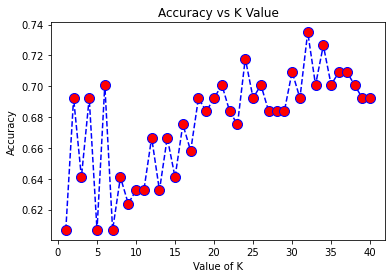

In [27]:
logistic(X_train,Y_train,X_test,Y_test)
knn(X_train,Y_train,X_test,Y_test,findK(X_train,Y_train,X_test,Y_test))
SVM(X_train,Y_train,X_test,Y_test)

<h3>Final Result</h3>
<table>
  <tr>
    <th>Algorithm</th>
    <th></th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td></td>
    <td>0.726</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>linear kernel</td>
    <td>0.700</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>poly kernel</td>
    <td>0.683</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>rbf kernel</td>
    <td>0.700</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>nearest neighbors=32</td>
    <td>0.641</td>
  </tr>
    
</table> 